In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
data=pd.read_csv(r"C:\Users\91805\OneDrive\Desktop\Dataset\Digit_recongination.csv")

In [13]:
print(data.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [14]:
y=data['label']
X=data.drop('label',axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


840/840 [==============================] - 32s 8ms/step - loss: 4.7884 - accuracy: 0.8545 - val_loss: 0.9671 - val_accuracy: 0.8865
Epoch 2/10
840/840 [==============================] - 4s 5ms/step - loss: 0.6693 - accuracy: 0.8988 - val_loss: 0.6428 - val_accuracy: 0.8875
Epoch 3/10
840/840 [==============================] - 4s 5ms/step - loss: 0.4100 - accuracy: 0.9185 - val_loss: 0.6052 - val_accuracy: 0.8961
Epoch 4/10
840/840 [==============================] - 4s 4ms/step - loss: 0.3150 - accuracy: 0.9267 - val_loss: 0.5244 - val_accuracy: 0.9238
Epoch 5/10
840/840 [==============================] - 4s 4ms/step - loss: 0.2854 - accuracy: 0.9342 - val_loss: 0.4677 - val_accuracy: 0.9269
Epoch 6/10
840/840 [==============================] - 4s 5ms/step - loss: 0.2583 - accuracy: 0.9390 - val_loss: 0.3659 - val_accuracy: 0.9284
Epoch 7/10
840/840 [==============================] - 4s 4ms/step - loss: 0.2450 - accuracy: 0.9404 - val_loss: 0.4838 - val_accuracy: 0.9271
Epo

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

263/263 [==============================] - 2s 3ms/step - loss: 0.4111 - accuracy: 0.9304
Test Accuracy: 0.9303571581840515


In [20]:
predictions = model.predict(X_test)

263/263 [==============================] - 1s 2ms/step


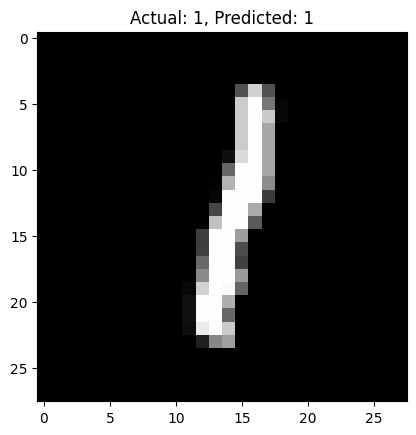

In [21]:
idx = np.random.randint(0, len(X_test))
plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
plt.title(f'Actual: {y_test.iloc[idx]}, Predicted: {np.argmax(predictions[idx])}')
plt.show()